# 1. load drive and install and load dependencies

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycaret

  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pyod-0.9.5-py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached lightgbm-3.3.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached mlflow-1.21.0-py3-none-any.whl (16.9 MB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cache

In [ ]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.4 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.8.1 which is incompatible.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [3]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip
  inflating: subset_10.csv           


In [4]:
data = pd.read_csv('subset_10.csv', index_col=0)
data.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,-0.296508,-0.095936,1.419227,-0.079582,-0.202538,2.275878,-0.944980,-0.332115,-0.295795,-0.322602,-0.078251,-0.251609,-0.450389,-0.280038,-0.208247,1.254934,-0.340695,-0.424307,-0.365255,-0.511625,-0.164532,-0.317861,-0.174058,-0.192115,-0.410630,-0.105355,-0.285387,1.800882,-0.212355,-0.333085,-0.568453,...,2.510091,-0.182170,-0.445091,-0.232213,0.839193,-0.148710,-0.157561,-0.665817,1.627726,2.929252,3.752024,-0.053761,-0.602856,2.797265,-0.548498,-0.963906,-0.304226,-0.226689,-0.224802,-0.181524,-0.120809,0.616167,0.633112,-0.171473,-0.238591,-0.183494,-0.336997,-0.171524,-0.333410,0.066321,-0.284784,-1.236136,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage
ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,-0.330718,-0.121260,-0.473610,-0.221898,-0.445567,-0.315318,-1.090314,-0.404402,-0.356656,-0.258395,-0.119093,4.775130,-0.317039,-0.157664,-0.124176,-0.728042,-0.282863,-0.221680,-0.444395,-0.327189,-0.221121,-0.357812,-0.177315,-0.184892,-0.390698,-0.146081,-0.286798,-0.412339,-0.318400,-0.371817,-0.964195,...,-0.193053,-0.098245,-0.309796,-0.272343,-1.405040,-0.187214,-0.236375,-0.031855,-0.739427,-0.392869,-0.328025,-0.149975,-0.545499,-0.278868,-0.161776,0.793728,-0.338451,-0.423338,3.398397,3.837188,-0.225741,1.171086,-0.853118,-0.181345,-0.174656,-0.144594,-0.321012,-0.257268,-0.392649,-1.322311,1.234960,0.850628,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell
GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,-0.316848,-0.134548,-0.488330,-0.178900,-0.514463,-0.295380,0.896807,-0.425794,-0.362639,-0.285961,-0.118961,-0.312215,-0.351266,-0.141408,-0.105225,-0.794916,-0.267249,-0.193238,-0.425187,-0.333225,-0.233320,-0.345479,-0.191265,-0.188457,-0.380927,-0.139163,-0.287852,-0.415528,-0.341753,-0.339481,1.249052,...,-0.181909,-0.077890,-0.307268,-0.312375,1.051417,-0.185299,-0.238428,-0.033041,-0.833691,-0.439555,-0.343546,-0.127695,2.437956,-0.261175,4.382756,-1.277835,-0.399502,-0.510792,-0.436643,-0.422582,-0.244247,-0.873464,1.180602,-0.169597,-0.158458,-0.141976,-0.308257,-0.220758,3.579736,-3.214363,-0.142946,0.945928,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell
GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,-0.302283,-0.101962,-0.481266,-0.205666,-0.353486,-0.330180,-1.126939,1.778547,2.101355,-0.348070,-0.093501,-0.266935,1.792534,-0.222964,-0.166076,-0.689498,-0.297045,-0.316700,-0.396968,-0.494939,-0.210438,-0.345373,-0.176377,-0.194003,-0.405211,-0.121287,-0.306903,1.686422,-0.281933,-0.358402,-0.305790,...,-0.349745,-0.152295,-0.411966,-0.285689,-0.095814,-0.160479,-0.196167,-0.492336,-0.631893,-0.305707,-0.394605,-0.122268,-0.572069,-0.266259,-0.411910,-0.005568,1.804333,-0.376868,1.785804,-0.293121,-0.193485,0.049589,1.546430,4.524909,-0.201492,-0.171496,2.289642,3.335222,-0.350693,-0.632696,-0.555727,-0.385962,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell
GSM4143657_GATCGATGTGTAACGG,-0.109905,-0.584470,-0.429646,-0.404012,-0.107612

## add new cell type lables for T cell hierarchical models

In [5]:
category_dict_2 = {
   'CD4 naive T-cell': 'CD4 T-cell',
   'CD4 regulatory T-cell (unspecified)': 'CD4 T-cell',
   'CD8 effector memory T-cell': 'CD8 T-cell',
   'CD4 helper T-cell (unspecified)': 'CD4 T-cell',
   'CD8 memory T-cell (unspecified)': 'CD8 T-cell',
   'CD4 follicular helper T-cell': 'CD4 T-cell',
   'CD8 T-cell (unspecified)': 'CD8 T-cell',
   'CD8 resident memory T-cell': 'CD8 T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'CD8 T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'CD8 T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'CD8 T-cell',
   'NK T-cell (unspecified)': 'other T-cell',
   'Th17 T-cell': 'other T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'CD4 T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'other T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'CD8 T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'CD4 T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'CD8 T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'other T-cell'
}

In [6]:
data['cell_type_2'] = data['cell_state'].apply(lambda cell: category_dict_2[cell])
data.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,-0.296508,-0.095936,1.419227,-0.079582,-0.202538,2.275878,-0.944980,-0.332115,-0.295795,-0.322602,-0.078251,-0.251609,-0.450389,-0.280038,-0.208247,1.254934,-0.340695,-0.424307,-0.365255,-0.511625,-0.164532,-0.317861,-0.174058,-0.192115,-0.410630,-0.105355,-0.285387,1.800882,-0.212355,-0.333085,-0.568453,...,-0.182170,-0.445091,-0.232213,0.839193,-0.148710,-0.157561,-0.665817,1.627726,2.929252,3.752024,-0.053761,-0.602856,2.797265,-0.548498,-0.963906,-0.304226,-0.226689,-0.224802,-0.181524,-0.120809,0.616167,0.633112,-0.171473,-0.238591,-0.183494,-0.336997,-0.171524,-0.333410,0.066321,-0.284784,-1.236136,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage,macrophage
ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,-0.330718,-0.121260,-0.473610,-0.221898,-0.445567,-0.315318,-1.090314,-0.404402,-0.356656,-0.258395,-0.119093,4.775130,-0.317039,-0.157664,-0.124176,-0.728042,-0.282863,-0.221680,-0.444395,-0.327189,-0.221121,-0.357812,-0.177315,-0.184892,-0.390698,-0.146081,-0.286798,-0.412339,-0.318400,-0.371817,-0.964195,...,-0.098245,-0.309796,-0.272343,-1.405040,-0.187214,-0.236375,-0.031855,-0.739427,-0.392869,-0.328025,-0.149975,-0.545499,-0.278868,-0.161776,0.793728,-0.338451,-0.423338,3.398397,3.837188,-0.225741,1.171086,-0.853118,-0.181345,-0.174656,-0.144594,-0.321012,-0.257268,-0.392649,-1.322311,1.234960,0.850628,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell,CD8 T-cell
GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,-0.316848,-0.134548,-0.488330,-0.178900,-0.514463,-0.295380,0.896807,-0.425794,-0.362639,-0.285961,-0.118961,-0.312215,-0.351266,-0.141408,-0.105225,-0.794916,-0.267249,-0.193238,-0.425187,-0.333225,-0.233320,-0.345479,-0.191265,-0.188457,-0.380927,-0.139163,-0.287852,-0.415528,-0.341753,-0.339481,1.249052,...,-0.077890,-0.307268,-0.312375,1.051417,-0.185299,-0.238428,-0.033041,-0.833691,-0.439555,-0.343546,-0.127695,2.437956,-0.261175,4.382756,-1.277835,-0.399502,-0.510792,-0.436643,-0.422582,-0.244247,-0.873464,1.180602,-0.169597,-0.158458,-0.141976,-0.308257,-0.220758,3.579736,-3.214363,-0.142946,0.945928,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell,CD8 T-cell
GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,-0.302283,-0.101962,-0.481266,-0.205666,-0.353486,-0.330180,-1.126939,1.778547,2.101355,-0.348070,-0.093501,-0.266935,1.792534,-0.222964,-0.166076,-0.689498,-0.297045,-0.316700,-0.396968,-0.494939,-0.210438,-0.345373,-0.176377,-0.194003,-0.405211,-0.121287,-0.306903,1.686422,-0.281933,-0.358402,-0.305790,...,-0.152295,-0.411966,-0.285689,-0.095814,-0.160479,-0.196167,-0.492336,-0.631893,-0.305707,-0.394605,-0.122268,-0.572069,-0.266259,-0.411910,-0.005568,1.804333,-0.376868,1.785804,-0.293121,-0.193485,0.049589,1.546430,4.524909,-0.201492,-0.171496,2.289642,3.335222,-0.350693,-0.632696,-0.555727,-0.385962,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell,CD8 T-cell
GSM4143657_GATCGATGTGTAACGG,-0.109905,-0.584470,-0.429646,-0.404

# 3. B Cells

In [7]:
df = data[data['cell_type'] == 'B-cell']

In [8]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
B-cell (unspecified),400,0.750469
GC-dependent memory B-cell,70,0.131332
naive B-cell,59,0.110694
GC-independent memory B-cell,4,0.007505


## Split Data

In [9]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


array([0.66838412, 0.74389478, 0.7239035 , 0.66828594, 0.75384668])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_b_cells_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_b_cells_unbalanced.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  71.96
F1 of logistic regression model :  68.57
F1 macro of logistic regression model :  33.07


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                              precision    recall  f1-score   support

        B-cell (unspecified)       0.79      0.89      0.84        80
  GC-dependent memory B-cell       0.33      0.36      0.34        14
GC-independent memory B-cell       0.00      0.00      0.00         1
                naive B-cell       0.50      0.08      0.14        12

                    accuracy                           0.72       107
                   macro avg       0.41      0.33      0.33       107
                weighted avg       0.69      0.72      0.69       107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  8,  0,  1],
       [ 9,  5,  0,  0],
       [ 0,  1,  0,  0],
       [10,  1,  0,  1]])

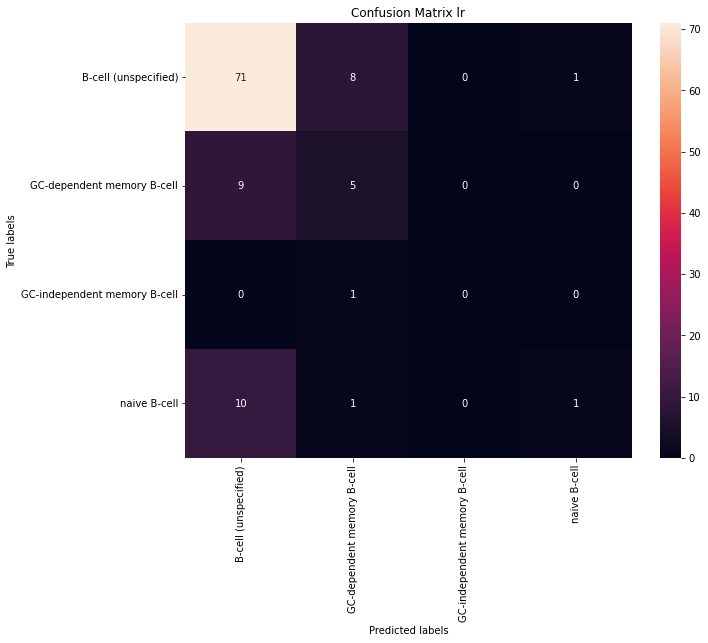

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.show()

# 4. Dendritic Cells

In [10]:
df = data[data['cell_type'] == 'dendritic cell']

In [11]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
conventional dendritic cell,47,0.391667
conventional dendritic cell 2,26,0.216667
plasmacytoid dendritic cell,24,0.200000
dendritic cell,20,0.166667
conventional dendritic cell 1,3,0.025000


## split data

In [12]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


array([0.83109244, 0.94365325, 1.        , 0.94800638, 0.76992481])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_dendritic_cells_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_dendritic_cells_unbalanced.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  87.5
F1 of logistic regression model :  85.75
F1 macro of logistic regression model :  71.84


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                               precision    recall  f1-score   support

  conventional dendritic cell       0.80      0.89      0.84         9
conventional dendritic cell 1       0.00      0.00      0.00         1
conventional dendritic cell 2       1.00      1.00      1.00         5
               dendritic cell       0.75      0.75      0.75         4
  plasmacytoid dendritic cell       1.00      1.00      1.00         5

                     accuracy                           0.88        24
                    macro avg       0.71      0.73      0.72        24
                 weighted avg       0.84      0.88      0.86        24



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [1, 0, 0, 3, 0],
       [0, 0, 0, 0, 5]])

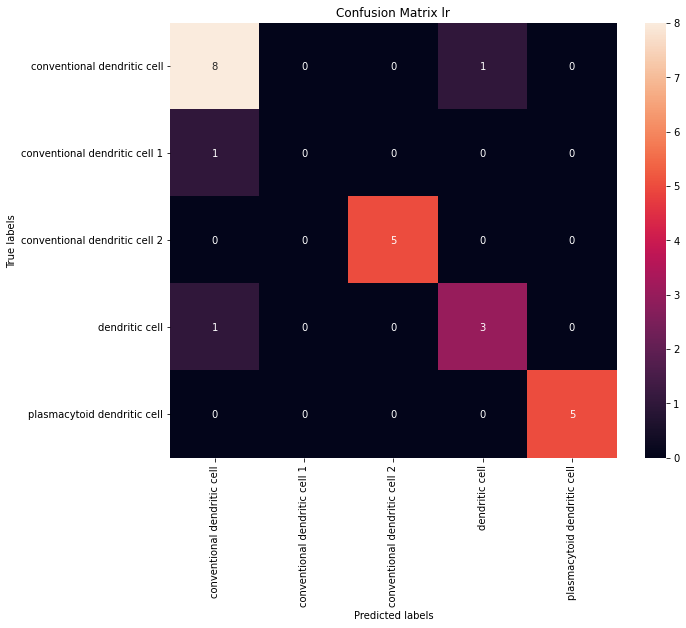

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.show()

# 5. Macrophages

In [13]:
df = data[data['cell_type'] == 'macrophage']

In [14]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
macrophage,328,0.714597
M2 macrophage,103,0.224401
M1 macrophage,14,0.030501
perivascular M2 macrophage,14,0.030501


## split data

In [15]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 3min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.80571211, 0.77547924, 0.79472291, 0.6992528 , 0.78016812])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_macrophage_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_macrophage_unbalanced.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  89.13
F1 of logistic regression model :  86.23
F1 macro of logistic regression model :  45.1


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                            precision    recall  f1-score   support

             M1 macrophage       0.00      0.00      0.00         3
             M2 macrophage       0.79      0.95      0.86        20
                macrophage       0.93      0.95      0.94        66
perivascular M2 macrophage       0.00      0.00      0.00         3

                  accuracy                           0.89        92
                 macro avg       0.43      0.48      0.45        92
              weighted avg       0.84      0.89      0.86        92



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  1,  2,  0],
       [ 0, 19,  1,  0],
       [ 0,  3, 63,  0],
       [ 0,  1,  2,  0]])

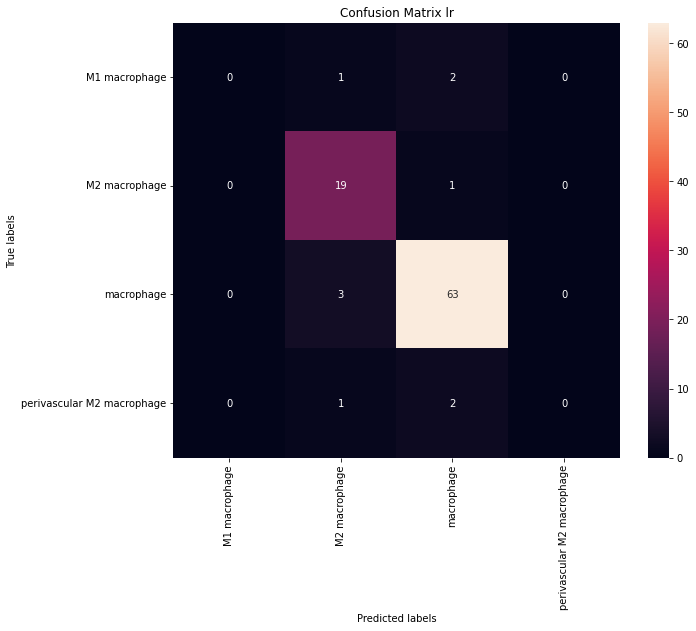

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.show()

# 6. Monocytes

In [16]:
df = data[data['cell_type'] == 'monocyte']

In [17]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
classical monocyte,86,0.609929
non-classical monocyte,55,0.390071


## split data

In [18]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([1.        , 1.        , 0.95405031, 1.        , 0.953814  ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_monocyte_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_monocyte_unbalanced.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  96.55
F1 of logistic regression model :  96.52
F1 macro of logistic regression model :  96.27


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

    classical monocyte       0.95      1.00      0.97        18
non-classical monocyte       1.00      0.91      0.95        11

              accuracy                           0.97        29
             macro avg       0.97      0.95      0.96        29
          weighted avg       0.97      0.97      0.97        29



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0],
       [ 1, 10]])

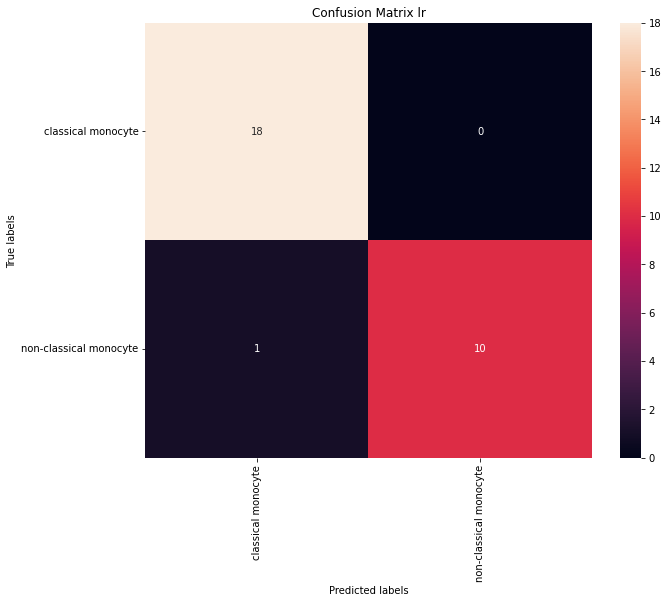

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.show()

# 7. T Cells

In [20]:
df_all = data[data['cell_type'] == 'T-cell']

In [21]:
count_celltype = pd.concat([pd.DataFrame({'count': df_all['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_all['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
CD4 naive T-cell,806,0.140247
CD4 regulatory T-cell (unspecified),777,0.135201
CD8 effector memory T-cell,694,0.120759
CD4 helper T-cell (unspecified),605,0.105272
CD8 memory T-cell (unspecified),514,0.089438
CD4 follicular helper T-cell,430,0.074822
CD8 resident memory T-cell,363,0.063163
CD8 T-cell (unspecified),350,0.060901
CD8 activated T-cell (unspecified),327,0.056899
CD8 exhausted T-cell (unspecified),196,0.034105


## 7.1 all subclasses at once

### split data

In [22]:
X = df_all.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df_all['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.65122949, 0.65455746, 0.64853051, 0.64583211, 0.61840241])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_all_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_t_cells_all_unbalanced.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  65.22
F1 of logistic regression model :  63.45
F1 macro of logistic regression model :  39.76


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                    CD4 T-cell (unspecified)       0.00      0.00      0.00        14
                   CD4 central memory T-cell       0.00      0.00      0.00         2
                CD4 follicular helper T-cell       0.82      0.87      0.85        86
             CD4 helper T-cell (unspecified)       0.52      0.68      0.59       121
                            CD4 naive T-cell       0.69      0.82      0.75       161
         CD4 regulatory T-cell (unspecified)       0.92      0.90      0.91       156
                    CD8 T-cell (unspecified)       0.31      0.23      0.26        70
          CD8 activated T-cell (unspecified)       0.56      0.48      0.52        65
                   CD8 central memory T-cell       0.00      0.00      0.00         1
          CD8 cytotoxic T-cell (unspecified)       0.17      0.11      0.13        18
                  CD8 effector memory T-cell       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   3,   1,   2,   1,   0,   0,   1,   2,   0,   0,
          0,   1,   0,   2,   0,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  75,   2,   1,   3,   0,   0,   0,   0,   0,   1,   0,
          2,   2,   0,   0,   0,   0,   0,   0],
       [  1,   0,   2,  82,  12,   4,   2,   1,   0,   2,  11,   0,   0,
          0,   0,   0,   2,   0,   2,   0,   0],
       [  0,   0,   2,  12, 132,   1,   2,   3,   0,   0,   2,   0,   0,
          0,   4,   0,   1,   0,   1,   1,   0],
       [  0,   0,   2,   7,   5, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   8,  16,   2,  16,   5,   0,   0,  18,   0,   0,
          0,   1,   0,   4,   0,   0,   0,   0],
       [  0,   0,   2,   3,   6,   0,   6,  31,   0,   0,  12,   1,   0,
          0,   1,   0,   2,   0,   0,   1,   0],
       [  0,   0,   0,  

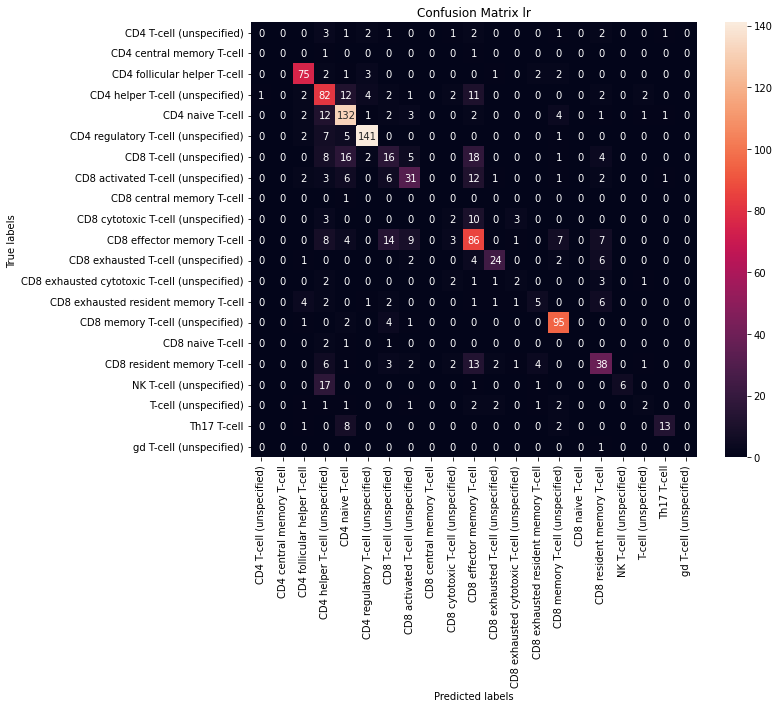

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

## 7.2 hierarchical

### 7.2.1 CD8, CD4 and other T cells

#### split data

In [23]:
X = df_all.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df_all['cell_type_2']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD8 T-cell      1972
CD4 T-cell      1042
other T-cell     615
Name: cell_type_2, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.84674941, 0.84251871, 0.83714342, 0.86049492, 0.84741921])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_type2_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_t_cells_type2_unbalanced.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  86.87
F1 of logistic regression model :  86.48
F1 macro of logistic regression model :  74.59


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  CD4 T-cell       0.85      0.90      0.88       540
  CD8 T-cell       0.91      0.89      0.90       547
other T-cell       0.59      0.38      0.46        63

    accuracy                           0.87      1150
   macro avg       0.78      0.72      0.75      1150
weighted avg       0.86      0.87      0.86      1150



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[487,  40,  13],
       [ 55, 488,   4],
       [ 28,  11,  24]])

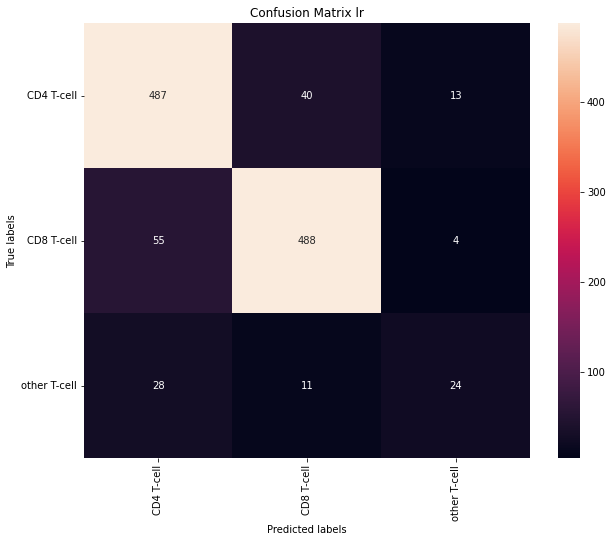

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

### 7.2.2 CD8 cells

#### split data

In [24]:
df = df_all[df_all['cell_type_2'] == 'CD8 T-cell']
df['cell_state'].value_counts()

CD8 effector memory T-cell                      694
CD8 memory T-cell (unspecified)                 514
CD8 resident memory T-cell                      363
CD8 T-cell (unspecified)                        350
CD8 activated T-cell (unspecified)              327
CD8 exhausted T-cell (unspecified)              196
CD8 exhausted resident memory T-cell            113
CD8 cytotoxic T-cell (unspecified)               91
CD8 exhausted cytotoxic T-cell (unspecified)     59
CD8 naive T-cell                                 19
CD8 central memory T-cell                         5
Name: cell_state, dtype: int64

In [25]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD8 memory T-cell (unspecified)                 200
CD8 exhausted resident memory T-cell            200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 effector memory T-cell                      200
CD8 resident memory T-cell                      200
CD8 T-cell (unspecified)                        200
CD8 exhausted T-cell (unspecified)              200
CD8 cytotoxic T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 naive T-cell                                146
CD8 central memory T-cell                        26
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.64856581, 0.6540569 , 0.6918707 , 0.59607428, 0.58630845])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd8_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_cd8_unbalanced.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  63.07
F1 of logistic regression model :  61.43
F1 macro of logistic regression model :  42.35


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                    CD8 T-cell (unspecified)       0.38      0.34      0.36        70
          CD8 activated T-cell (unspecified)       0.62      0.60      0.61        65
                   CD8 central memory T-cell       0.00      0.00      0.00         1
          CD8 cytotoxic T-cell (unspecified)       0.40      0.11      0.17        18
                  CD8 effector memory T-cell       0.59      0.73      0.65       139
          CD8 exhausted T-cell (unspecified)       0.81      0.54      0.65        39
CD8 exhausted cytotoxic T-cell (unspecified)       0.38      0.25      0.30        12
        CD8 exhausted resident memory T-cell       0.50      0.30      0.38        23
             CD8 memory T-cell (unspecified)       0.88      0.96      0.92       103
                            CD8 naive T-cell       0.00      0.00      0.00         4
                  CD8 resident memory T-cell       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,   9,   0,   0,  26,   0,   0,   1,   2,   0,   8],
       [ 10,  39,   0,   0,  13,   0,   0,   0,   2,   0,   1],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   2,  12,   0,   1,   0,   0,   0,   1],
       [ 15,   5,   0,   1, 102,   0,   1,   0,   6,   0,   9],
       [  1,   3,   0,   0,   5,  21,   1,   0,   4,   0,   4],
       [  0,   1,   0,   1,   2,   2,   3,   1,   0,   0,   2],
       [  3,   1,   0,   0,   1,   1,   1,   7,   0,   0,   9],
       [  0,   1,   0,   0,   2,   1,   0,   0,  99,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   3,   0,   1,   9,   1,   1,   5,   0,   0,  48]])

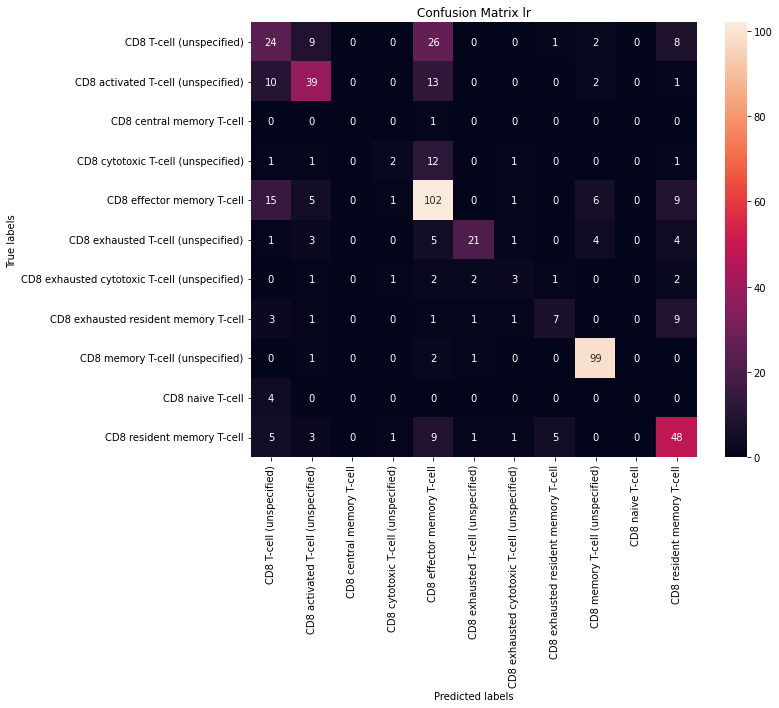

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

### 7.2.3 CD4 cells

#### split data

In [26]:
df = df_all[df_all['cell_type_2'] == 'CD4 T-cell']
df['cell_state'].value_counts()

CD4 naive T-cell                       806
CD4 regulatory T-cell (unspecified)    777
CD4 helper T-cell (unspecified)        605
CD4 follicular helper T-cell           430
CD4 T-cell (unspecified)                72
CD4 central memory T-cell               11
Name: cell_state, dtype: int64

In [27]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD4 follicular helper T-cell           200
CD4 regulatory T-cell (unspecified)    200
CD4 T-cell (unspecified)               200
CD4 helper T-cell (unspecified)        200
CD4 naive T-cell                       200
CD4 central memory T-cell               42
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.85298871, 0.81238776, 0.82578656, 0.81837299, 0.82391955])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd4_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_cd4_unbalanced.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  85.95
F1 of logistic regression model :  84.68
F1 macro of logistic regression model :  57.96


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                     precision    recall  f1-score   support

           CD4 T-cell (unspecified)       0.00      0.00      0.00        14
          CD4 central memory T-cell       0.00      0.00      0.00         2
       CD4 follicular helper T-cell       0.86      0.91      0.88        86
    CD4 helper T-cell (unspecified)       0.79      0.82      0.80       121
                   CD4 naive T-cell       0.87      0.91      0.89       162
CD4 regulatory T-cell (unspecified)       0.91      0.90      0.90       156

                           accuracy                           0.86       541
                          macro avg       0.57      0.59      0.58       541
                       weighted avg       0.83      0.86      0.85       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   7,   4,   2],
       [  0,   0,   0,   0,   2,   0],
       [  0,   0,  78,   3,   1,   4],
       [  0,   0,   4,  99,  11,   7],
       [  0,   0,   4,   9, 148,   1],
       [  0,   0,   4,   8,   4, 140]])

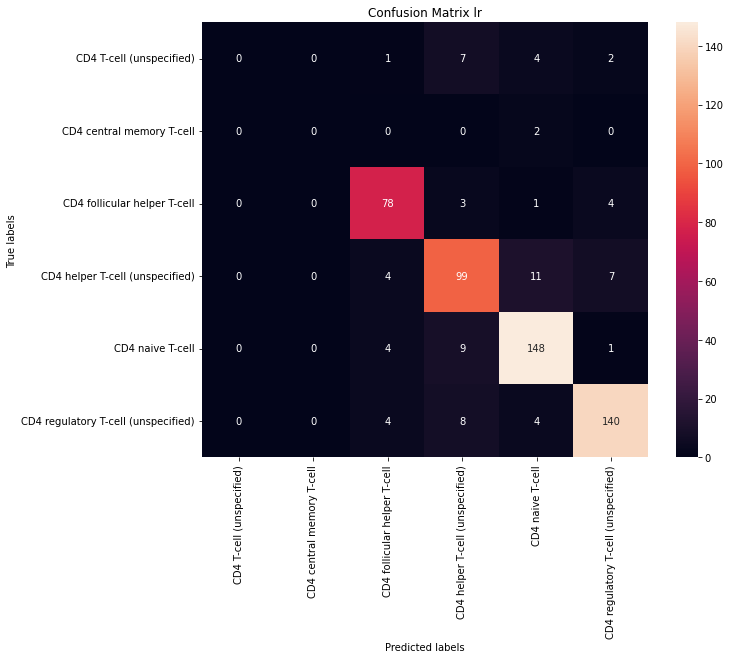

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

### 7.2.4 other T-cells

#### split data

In [28]:
df = df_all[df_all['cell_type_2'] == 'other T-cell']
df['cell_state'].value_counts()

NK T-cell (unspecified)    127
Th17 T-cell                121
T-cell (unspecified)        63
gd T-cell (unspecified)      4
Name: cell_state, dtype: int64

In [29]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

T-cell (unspecified)       200
Th17 T-cell                200
NK T-cell (unspecified)    200
gd T-cell (unspecified)     15
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.8666645 , 0.86702752, 0.93868687, 0.9163842 , 0.95154791])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_other-t-cell_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_other-t-cell_unbalanced.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  95.24
F1 of logistic regression model :  94.39
F1 macro of logistic regression model :  71.44


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                         precision    recall  f1-score   support

NK T-cell (unspecified)       0.93      1.00      0.96        25
   T-cell (unspecified)       1.00      0.85      0.92        13
            Th17 T-cell       0.96      1.00      0.98        24
gd T-cell (unspecified)       0.00      0.00      0.00         1

               accuracy                           0.95        63
              macro avg       0.72      0.71      0.71        63
           weighted avg       0.94      0.95      0.94        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  0,  0,  0],
       [ 1, 11,  1,  0],
       [ 0,  0, 24,  0],
       [ 1,  0,  0,  0]])

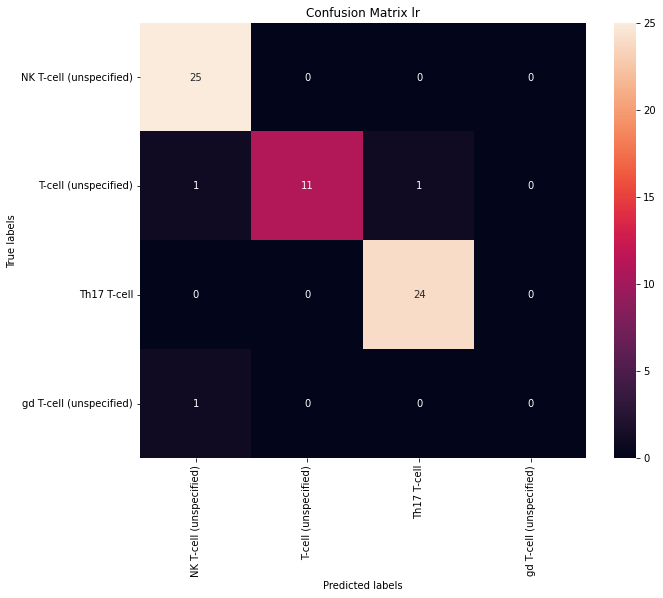

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

# 8. Other Major Cell Types
**All these cell types do not need a model since there are no subclasse**

## 8.1 Myeloid Cells

In [30]:
df_myeloid = data[data['cell_type'] == 'myeloid cell']

In [31]:
count_celltype = pd.concat([pd.DataFrame({'count': df_myeloid['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_myeloid['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
myeloid cell (unspecified),6,1.0


## 8.2 Plasma Cells

In [32]:
df_plasma = data[data['cell_type'] == 'plasma cell']

In [33]:
count_celltype = pd.concat([pd.DataFrame({'count': df_plasma['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_plasma['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
plasma cell,226,1.0


## 8.3 Mast Cells

In [34]:
df_mast = data[data['cell_type'] == 'mast cell']

In [35]:
count_celltype = pd.concat([pd.DataFrame({'count': df_mast['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_mast['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
mast cell,42,1.0


## 8.4 Killer Cells

In [36]:
df_killer = data[data['cell_type'] == 'killer cell']

In [37]:
count_celltype = pd.concat([pd.DataFrame({'count': df_killer['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_killer['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
natural killer cell,186,1.0


## 8.5 Lymphocyte

In [38]:
df_lymphocyte= data[data['cell_type'] == 'lymphocyte']

In [39]:
count_celltype = pd.concat([pd.DataFrame({'count': df_lymphocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_lymphocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
lymphocyte,62,1.0


## 8.6  Leukocyte

In [40]:
df_leukocyte= data[data['cell_type'] == 'leukocyte']

In [41]:
count_celltype = pd.concat([pd.DataFrame({'count': df_leukocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_leukocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
leukocyte,11,1.0


## 8.7 Granulocyte

In [42]:
df_granulocyte= data[data['cell_type'] == 'granulocyte']

In [43]:
count_celltype = pd.concat([pd.DataFrame({'count': df_granulocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_granulocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
granulocyte,64,1.0
